# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob as tb
from wordcloud import WordCloud, STOPWORDS
import emoji

In [2]:
comments = pd.read_csv(r'N:/Personal_Projects/git/Youtube/UScomments.csv' , on_bad_lines="skip")

C:\Users\nihar\AppData\Local\Temp\ipykernel_26400\2598414028.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'N:/Personal_Projects/git/Youtube/UScomments.csv' , on_bad_lines="skip")


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
comments.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [5]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [6]:
comments.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [7]:
comments.shape

(691400, 4)

In [8]:
sample_df = comments[0:1000]

In [9]:
sample_df.shape

(1000, 4)

In [10]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [11]:
comments.dropna(inplace=True)

In [12]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [13]:
tb("Logan Paul its yo big day !!!!").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [14]:
tb("Logan Paul its yo big day !!!!").sentiment.polarity

0.0

In [15]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(tb(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [16]:
len(polarity)

691374

In [17]:
comments['polarity'] = polarity

In [18]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# Word cloud analysis

In [19]:
filter1 = comments['polarity'] == 1
filter1

0         False
1         False
2         False
3         False
4         False
          ...  
691395    False
691396    False
691397    False
691398    False
691399    False
Name: polarity, Length: 691374, dtype: bool

In [20]:
comments_postieve = comments[filter1]

In [21]:
comments_postieve

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [22]:
filter2 = comments['polarity'] == -1 | 0
filter2

0         False
1         False
2         False
3         False
4         False
          ...  
691395    False
691396    False
691397    False
691398    False
691399    False
Name: polarity, Length: 691374, dtype: bool

In [23]:
comments_negative = comments[filter2]

In [24]:
comments_negative

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [25]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [27]:
type(comments['comment_text'])

pandas.core.series.Series

In [28]:
total_comments_postieve = ' '.join(comments_postieve['comment_text'])

In [29]:
total_comments_postieve

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [30]:
total_comments_negative = ''.join(comments_negative['comment_text'])

In [31]:
total_comments_negative

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!!Well… The brain surgeon Ben Carson just proved how truly insane he is…WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!WTF BRUH!!!!!!cheeseus christ thats insane!!!this is the worst thing i've heard. ever.Economy is horrible in Cuba. It's going to be years before they get out of this.Sub to me if this is terriblePATHETICI don't like this sportscaster  sounds very annoyingcommentators are awfulThis tv show became trump witch hunt tube... and frankly, boring.Arpaio should be arrested again for horribly butchering that song.This  show has become one-noted and pathetic.HARD CANDY!!!!!!!!!!!Tired of the philosophy add !!!!!!!boring0:22   **laughs at terrible pun**Why is media even covering this disgusting woman anymore?How is this trending ? Awfula horrible attempt to try and get us to freak outthis is one of the worst videos I've ever seenWhats with the horrible music? tfShe is the worst.Boringbori

In [32]:
word_postieves = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_postieve)

In [33]:
word_postieves

In [34]:
word_negatives = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

In [35]:
word_negatives

(-0.5, 399.5, 199.5, -0.5)

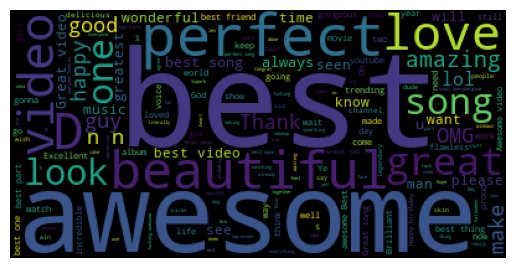

In [36]:
plt.imshow(word_postieves)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

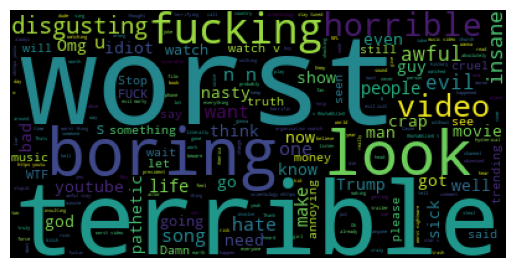

In [37]:
plt.imshow(word_negatives)
plt.axis('off')

# Emoji Analysis

In [38]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [39]:
comments = 'trending 😉'

In [40]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😍', '❤', '❤', '❤', '😘']

In [41]:
emoji_list = []
for char in comments:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [42]:
emoji_list

['😉']